# Approach-1 VADERS (Valence Aware Dictionary and sEntiment Reasoner) - Bag of Words Approach

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [6]:
filepath = "data/Reviews.csv"
df = pd.read_csv(filepath)

In [7]:
df = df.head(500)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


<Axes: title={'center': 'count of reviews by stars'}, xlabel='Score'>

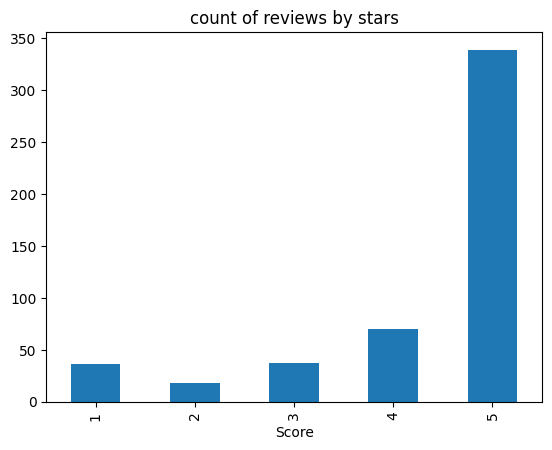

In [8]:
df.Score.value_counts().sort_index().plot(kind="bar", title="count of reviews by stars")

In [9]:
example = df["Text"].values[50]
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [11]:
sia = SentimentIntensityAnalyzer()

In [12]:
sia.polarity_scores("I am going to the gym!")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

_It should be 1.0 pos tho!!!!!!_

In [13]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [14]:
res = {}
for i, row in df.iterrows():
    Text = row.Text
    Id = row.Id
    res[Id] = sia.polarity_scores(Text)

In [15]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [16]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {"index" : "Id"})
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


In [17]:
vaders = vaders.merge(df, how="left", left_index=True, right_index=True)
vaders

,Id_x,neg,neu,pos,compound,Id_y,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [18]:
vaders.loc[:,["neg", "neu", "pos", "compound", "Score", "Summary", "Text"]]

,neg,neu,pos,compound,Score,Summary,Text
0,0.000,0.695,0.305,0.9441,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0.138,0.862,0.000,-0.5664,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,0.091,0.754,0.155,0.8265,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,0.000,1.000,0.000,0.0000,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0.000,0.552,0.448,0.9468,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...
495,0.000,0.554,0.446,0.9725,5,amazing chips,i rarely eat chips but i saw these and tried t...
496,0.059,0.799,0.142,0.7833,5,Best Chip Ever,This is easily the best potato chip that I hav...
497,0.025,0.762,0.212,0.9848,4,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,0.041,0.904,0.055,0.1280,4,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


## Plot VADERS result

<Axes: xlabel='Score', ylabel='compound'>

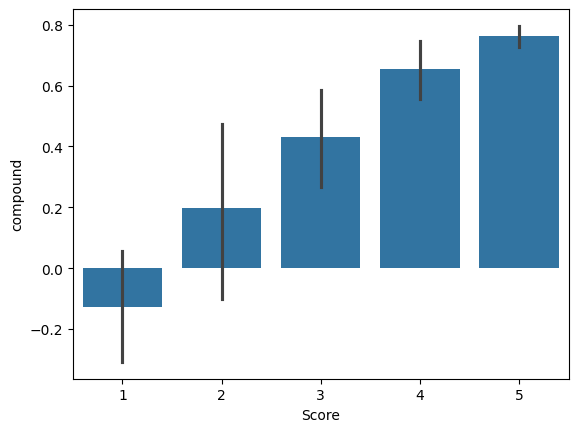

In [28]:
sns.barplot(data=vaders, x="Score", y="compound")

Text(0.5, 1.0, 'Positive')

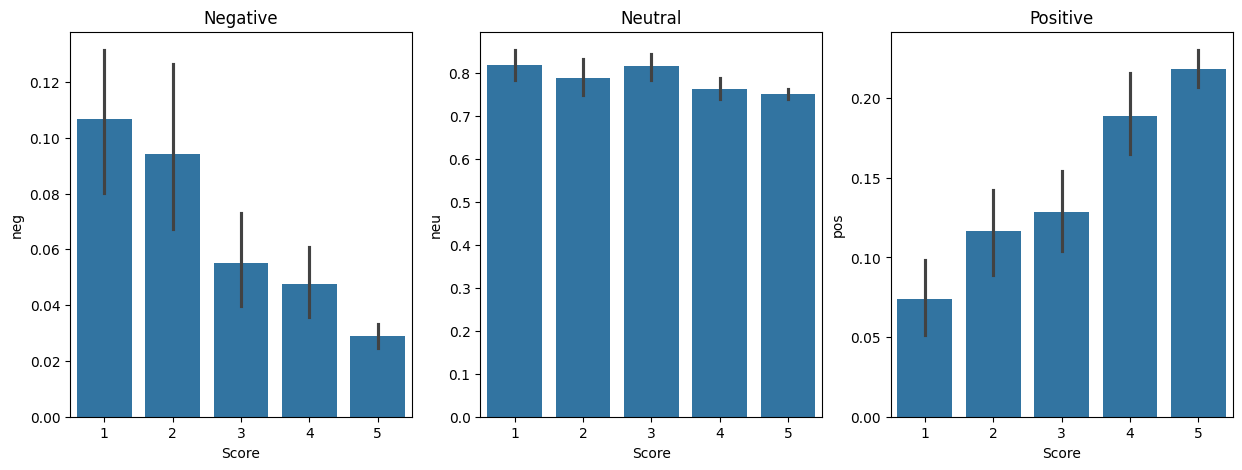

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x="Score", y="neg", ax=axs[0])
sns.barplot(data=vaders, x="Score", y="neu", ax=axs[1])
sns.barplot(data=vaders, x="Score", y="pos", ax=axs[2])
axs[0].set_title("Negative")
axs[1].set_title("Neutral")
axs[2].set_title("Positive")

# Approach-2 Roberta Pretrained Model
- Use a model trained on a large corpus of data.
- Transformer model accoutns for the words but also the context related to other words.

In [2]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [3]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [19]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [27]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors = "pt")
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    "roberta_neg" : scores[0],
    "roberta_neu" : scores[1],
    "roberta_pos" : scores[2]
}
scores_dict

{'roberta_neg': 0.97635514,
 'roberta_neu': 0.020687465,
 'roberta_pos': 0.0029573692}

In [29]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = "pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        "roberta_neg" : scores[0],
        "roberta_neu" : scores[1],
        "roberta_pos" : scores[2]
    }
    return scores_dict

In [34]:
res = {}
for i, row in df.iterrows():
    try:
        Text = row.Text
        Id = row.Id
        vader_result = sia.polarity_scores(Text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(Text)
        results = {**vader_result_rename, **roberta_result}
        res[Id] = results
    except RuntimeError:
        print(f'Broke for id {Id}, text: {Text}')

Broke for id 83, text: I know the product title says Molecular Gastronomy, but don't let that scare you off.  I have been looking for this for a while now, not for food science, but for something more down to earth.  I use it to make my own coffee creamer.<br /><br />I have to have my coffee blonde and sweet - but the flavored creamers are full of the bad kinds of fat, and honestly, I hate to use manufactured "food" items.  I really don't think they are good for the body.  On the other hand, I hate using cold milk or cream, because I like HOT coffee.<br /><br />I stumbled across this on Amazon one day and got the idea of making my own creamer.  I also bought low-fat (non-instant) milk powder and regular milk powder. The non-instant lowfat milk is a little sweeter and tastes fresher than regular instant low-fat milk, but does not dissolve good in cold water - which is not a problem for hot coffee.  You will have to play with the ratios - I would not do just the heavy cream, it made the 

_the text is too big that the model couldn't handle that_

In [44]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={"index":"Id"})
results_df = results_df.merge(df, how="left", left_on="Id", right_on="Id")
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plot Roberta Results

Text(0.5, 1.0, 'Positive')

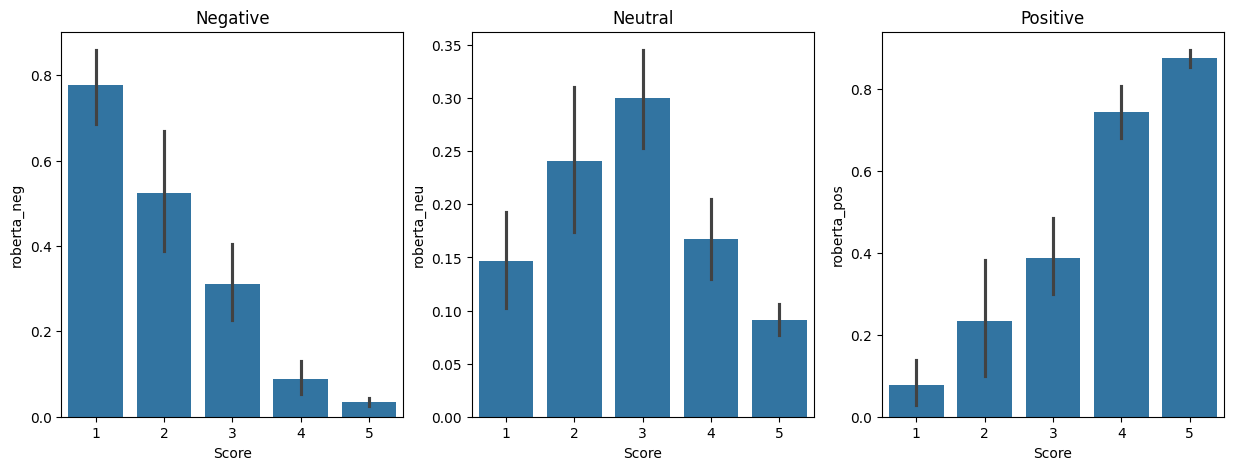

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=results_df, x="Score", y="roberta_neg", ax=axs[0])
sns.barplot(data=results_df, x="Score", y="roberta_neu", ax=axs[1])
sns.barplot(data=results_df, x="Score", y="roberta_pos", ax=axs[2])
axs[0].set_title("Negative")
axs[1].set_title("Neutral")
axs[2].set_title("Positive")

## Compare Scores

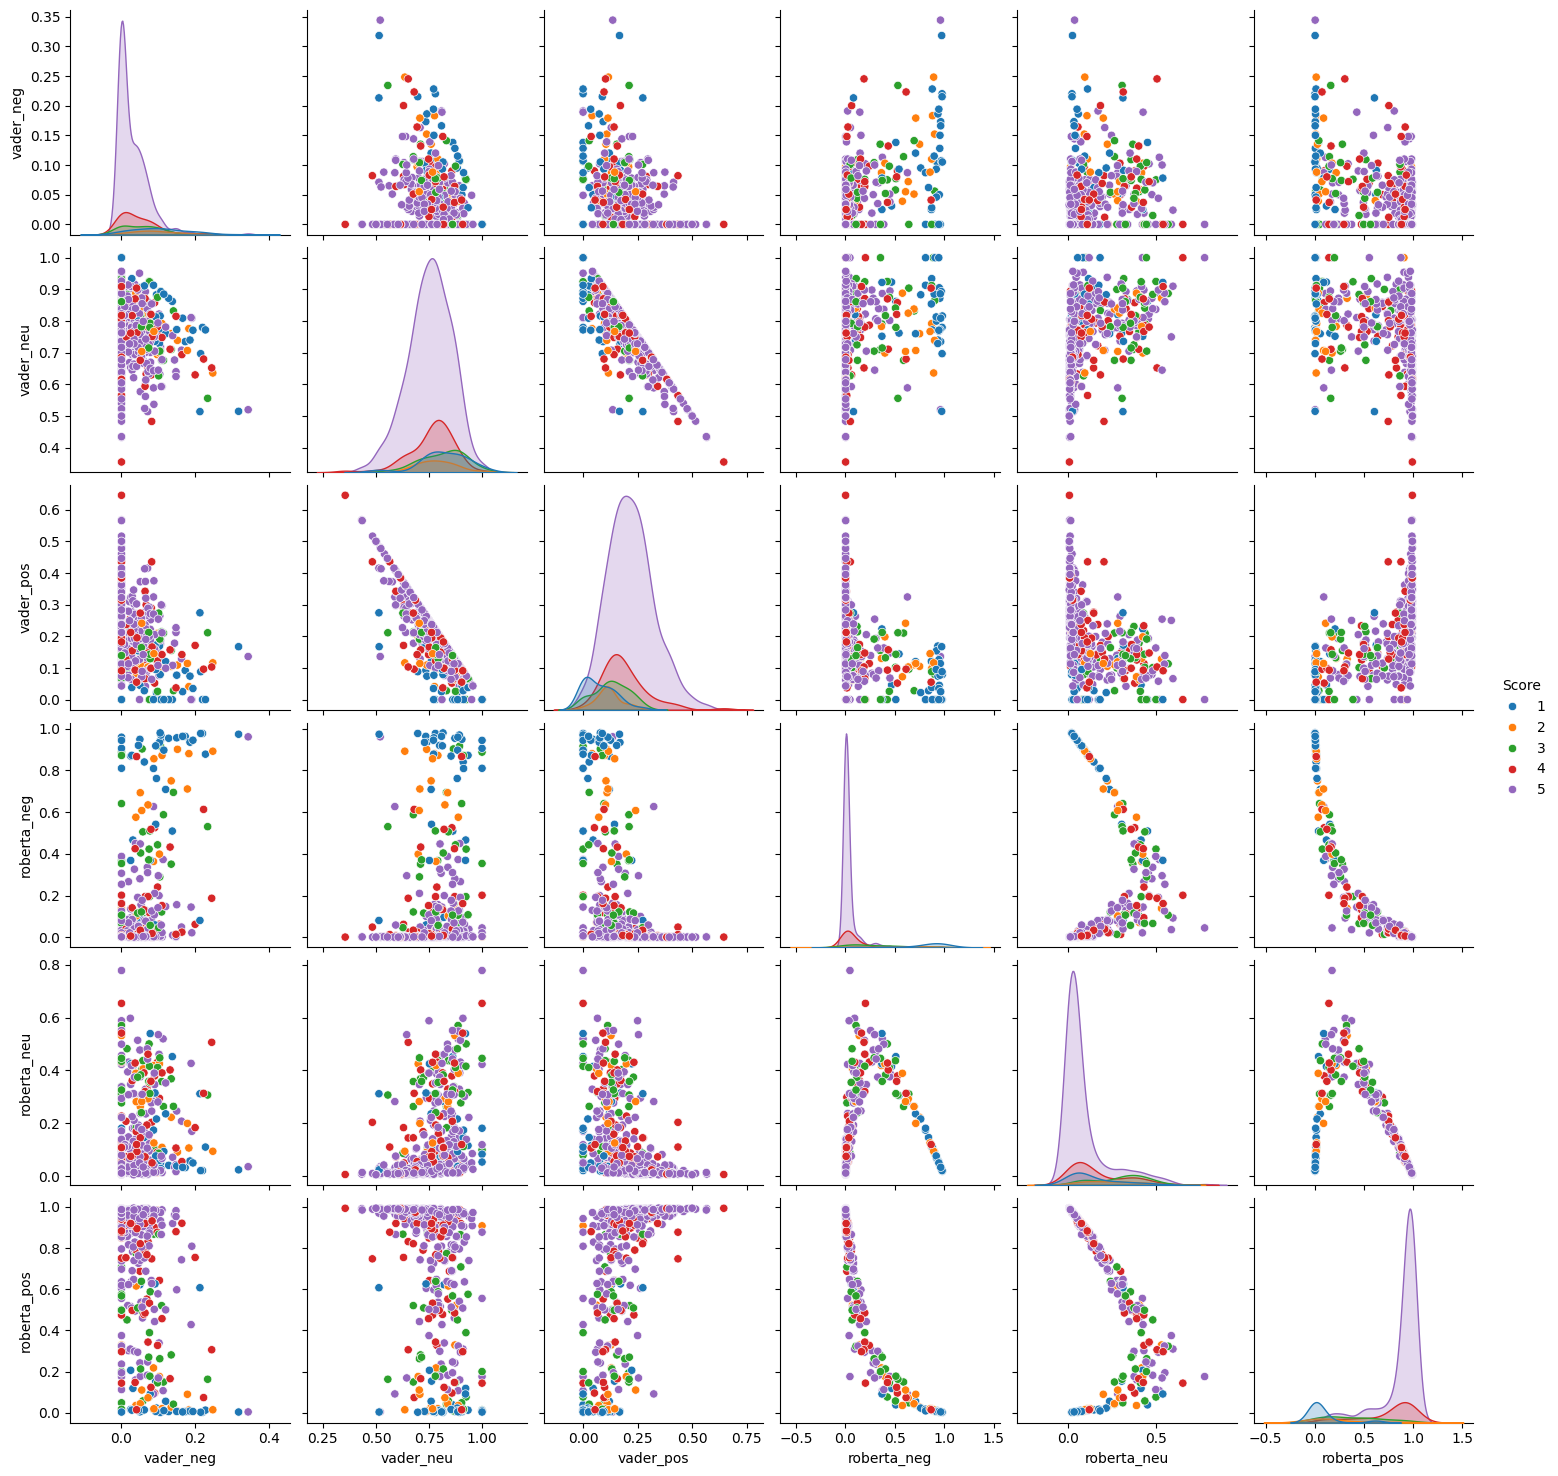

In [47]:
results_df.columns
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue="Score", palette="tab10")

## Review through some examples

In [60]:
# Positive reivew according to the Roberta model but has Score 1
results_df.query("Score == 1").sort_values("roberta_pos", ascending=False)["Text"].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [61]:
# Positive reivew according to the Vader model but has Score 1
results_df.query("Score == 1").sort_values("vader_pos", ascending=False)["Text"].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [68]:
# Negative Sentiment 5 Star Review (Roberta Model)
results_df.query("Score == 5").sort_values("roberta_pos", ascending=True)["Text"].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [70]:
# Negative Sentiment 5 Star Review (Roberta Model)
results_df.query("Score == 5").sort_values("vader_neg", ascending=False)["Text"].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Transformer Pipeline

In [71]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [74]:
sentiment_pipeline("I am going to the gym!")

[{'label': 'POSITIVE', 'score': 0.9959138035774231}]

## <span style="color: blue;">_PERFECTO!!_</span>